### TASK 1

In [1]:
import csv

In [2]:
# open the csv file in read mode ('r')
with open('acw_user_data.csv', 'r') as file:  
# read the csv file
    csv_reader = csv.DictReader(file)    
    header = csv_reader.fieldnames
    # iterate through the rows in the csv file
    for row in csv_reader:        
        print(row)               

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (Km)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Credit Ca

#### TASK 2

In [3]:
import csv
vehicles = []
credit_cards = []
addresses = []

with open('acw_user_data.csv', 'r') as csvfile:
    
    csvreader = csv.DictReader(csvfile)
# iterate through the rows and convert flat structures into  nested structures 
    for row in csvreader:
        
#(a)     
        
        vehicle = {
            "make": row['Vehicle Make'].strip(),
            "model": row['Vehicle Model'].strip(),
            "year": int(row['Vehicle Year'].strip()),
            "type": row['Vehicle Type'].strip()
        }
# (b)
        credit_card = {
            "start_date": row['Credit Card Start Date'].strip(),
            "end_date": row['Credit Card Expiry Date'].strip(),
            "number": row['Credit Card Number'].strip(),
            "security_code": row['Credit Card CVV'].strip(),
            "IBAN" :row['Bank IBAN'].strip()
          
        }
# (c)
        address = {
            "main_address": row['Address Street'].strip(),
            "city": row['Address City'].strip(),
        "postcode": row['Address Postcode'].strip()
        }
        
        vehicles.append(vehicle)
        credit_cards.append(credit_card)
        addresses.append(address)


#### TASK 3

In [4]:
import csv
# list to store indexes of blank and corected rows
blank_rows = []

with open('acw_user_data.csv', 'r') as csvfile:
    
    csvreader = csv.DictReader(csvfile)
    
   
    for index, row in enumerate(csvreader, start=0):
        
        if row['Dependants'] == '':
            row['Dependants'] = '0'
            blank_rows.append(index)
print('Problematic rows for dependants:', blank_rows)


Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


#### TASK 4

In [5]:
import csv
import json

# List to store processed records
customers = []

# Open the CSV file in read mode
with open('acw_user_data.csv', 'r') as csvfile:
    # Create a CSV reader object
    csvreader = csv.DictReader(csvfile)
    
    # Iterate through each row in the CSV file
    for row in csvreader:
        # Create nested structures for Vehicle, Credit Card, and Address
        person ={
         'First Name': row['First Name'],
            'Last Name':row['Last Name'],
            'Sex': row['Sex'],
            'Age':int(row['Age (Years)']),
            'Marital Status':row['Marital Status'],
            'Retired': (row['Retired']),
            'dependants': row['Dependants'], 
                        
            'Salary':int(row['Yearly Salary (GBP)']),
            'Pension' : int(row['Yearly Pension (GBP)']),
            'Company' : row['Employer Company'],
            'Distance of Commute': float(row['Distance Commuted to Work (Km)']),  
            
        'vehicle' : {
            "make": row['Vehicle Make'],
            "model": row['Vehicle Model'],
            "year": int(row['Vehicle Year']),
            "type": row['Vehicle Type']
        },
        
        'credit_card' : {
           "start_date": row['Credit Card Start Date'],
            "end_date": row['Credit Card Expiry Date'],
            "number": row['Credit Card Number'],
            "security_code": row['Credit Card CVV'],
            "Iban": row["Bank IBAN"]
        },
        
        'address' : {
           "main_address": row['Address Street'],
            "city": row['Address City'],
            "postcode": row['Address Postcode']
        },
                    
        }
        
        # Append the dictionary to the processed_data list
        customers.append(person)



In [6]:
# Write the processed data to a JSON file
with open('processed.json', 'w') as jsonfile:
    json.dump(customers, jsonfile, indent=4)

print('All records of customers has been written to "processed.json" file.')

All records of customers has been written to "processed.json" file.


#### TASK 5

In [7]:
import csv
import json

# Lists to store retired and employed customers
retired_customers = []
employed_customers = []

# iterate through the customers from Task 5
for row in customers:
        if row['Company']== 'N/A':
            retired_customers.append(row)
        else:
            employed_customers.append(row)
     

In [8]:
# Write the retired customers list to retired.json
with open('retired.json', 'w') as retired_file:
    json.dump(retired_customers, retired_file, indent=4)

# Write the employed customers list to employed.json
with open('employed.json', 'w') as employed_file:
    json.dump(employed_customers, employed_file, indent=4)

print('List of Retired customers have been written to retired.json.')
print('List of Employed customers have been written to employed.json')

List of Retired customers have been written to retired.json.
List of Employed customers have been written to employed.json


#### TASK 6

In [9]:
import csv
import json
from datetime import datetime

In [10]:
# This fuction detects if the start and end date of a credit card is over ten years.
def flagged_row(row):
    try:
        credit_card_start_date = datetime.strptime(row['Credit Card Start Date'],'%m/%y')
        credit_card_Expiry_date = datetime.strptime(row['Credit Card Expiry Date'],'%m/%y')
    except ValueError:
        return False
    # calculate the difference between the end and start dates of the credit card
    difference = (credit_card_Expiry_date - credit_card_start_date).days/365
    
    # create a new colunn to record the differece in years between the end and start dates of the credit card
    row['credit_card_Expiry_date - credit_card_start_date'] = difference 
    
    #check if the year-difference is more than 10 years
    if difference >10:
        return True
    # Otherwise, the year-differnce is less than or equal to 10 years 
    else:
        if difference == 10 and difference < 10:
            return False

In [11]:
# list to store customers whose credit cards has more than 10 years between their start and end dates
remove_ccard_customers = []
# iterate through rows 
with open('acw_user_data.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        # We Check if the current customer's credit card is expired
        if flagged_row(row) == True:
            remove_ccard_customers.append(   {
         'First Name': row['First Name'],
            'Last Name':row['Last Name'],
            'Sex': row['Sex'],
            'Age':int(row['Age (Years)']),
            'Marital Status':row['Marital Status'],
            'Retired': (row['Retired']),
            'dependants': row['Dependants'], 
                        
            'Salary':int(row['Yearly Salary (GBP)']),
            'Pension' : int(row['Yearly Pension (GBP)']),
            'Company' : row['Employer Company'],
            'Distance of Commute': float(row['Distance Commuted to Work (Km)']),  
            
        'vehicle' : {
            "make": row['Vehicle Make'],
            "model": row['Vehicle Model'],
            "year": int(row['Vehicle Year']),
            "type": row['Vehicle Type']
        },
        
        'credit_card' : {
           "start_date": row['Credit Card Start Date'],
            "end_date": row['Credit Card Expiry Date'],
            "number": row['Credit Card Number'],
            "security_code": row['Credit Card CVV'],
            "Iban": row["Bank IBAN"]
        },
        
        'address' : {
           "main_address": row['Address Street'],
            "city": row['Address City'],
            "postcode": row['Address Postcode']
        },
                    
        })

In [12]:
# write customers with more than 10 years between start and end date of their credit card to a json file
with open('remove_ccard.json', 'w') as remove_ccard_file:
    json.dump(remove_ccard_customers, remove_ccard_file, indent=4)

print('rows for Customers with more than 10 years between the start and end date of their credit card have been written to remove_ccard.json.')

rows for Customers with more than 10 years between the start and end date of their credit card have been written to remove_ccard.json.


#### TASK 7

In [13]:
# read data from a json file
import json
with open('processed.json','r') as file:
    data = json.load(file)

# calculate the salary - commute attribute

for row in data:
    
    commute_distance_km = float(row['Distance of Commute']) 
    salary = int(row['Salary']) 
    if row['Distance of Commute']<=1:
        row['salary-commute'] = salary
    else:
        row['salary-commute'] = salary / commute_distance_km
    
# sort data records by the 'salary-commute' attribute
sorted_data = sorted(data, key=lambda x: x['salary-commute'])


In [14]:
# Write sorted data to commute.json
with open('commute.json', 'w') as outfile:
    json.dump(sorted_data, outfile, indent=4)

print("Data sorted by Salary-Commute has been written to commute.json.")


Data sorted by Salary-Commute has been written to commute.json.


# DATA VISUALISATION

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Question one

##### Obtain the Data Series for Salary, and Age, and calculate the following:
##### a. Mean Salary
##### b. Median Age

In [16]:
df=pd.read_csv('acw_user_data.csv')

In [17]:
df.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [18]:
# create a new dataframe for Yearly salary and Ages
df1= df[['Yearly Salary (GBP)', 'Age (Years)']]

In [19]:
df1

,Yearly Salary (GBP),Age (Years)
0,72838,89
1,54016,46
2,68049,22
3,91337,56
4,18446,57
...,...,...
995,84645,48
996,93314,22
997,20940,38
998,82412,45


In [20]:
mean_salary = df1['Yearly Salary (GBP)'].mean()

In [21]:
median_age = df1['Age (Years)'].median()

In [22]:
print('Mean salary is: ', mean_salary)
print('Median Age is : ', median_age)

Mean salary is:  57814.078
Median Age is :  54.0


#### Question  2

#### Perform univariate plots of the following data attributes:
#### a. Age, calculating how many bins would be required for a bin_width of 5.
#### b. Dependents, fixing data errors with seaborn itself.
#### c. Age (of default bins), conditioned on Marital Status

##### (a)

In [23]:
max_Age =df['Age (Years)'].max()
min_Age =df['Age (Years)'].min()

 The number of bins is 15


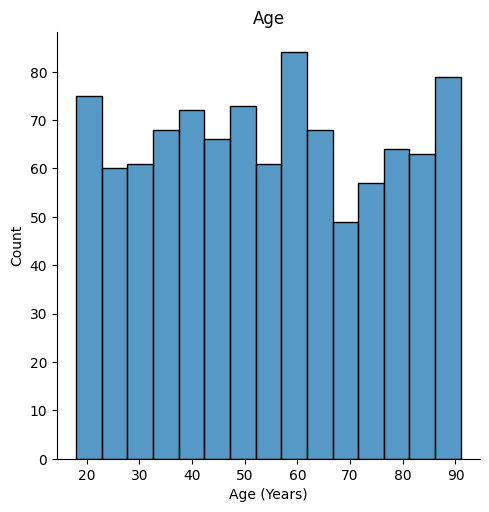

In [24]:
# Set the bin width
bin_width = 5

#Calculate the number of bins based on the bin width and the range of the data
bin_count = round(int((max_Age) - (min_Age))  / bin_width)

# Create a histogram
age_plot = sns.displot(df1['Age (Years)'], bins=(bin_count), edgecolor='black')
print(f' The number of bins is {bin_count}')
age_plot.set(title = 'Age')

plt.show()


##### (b)

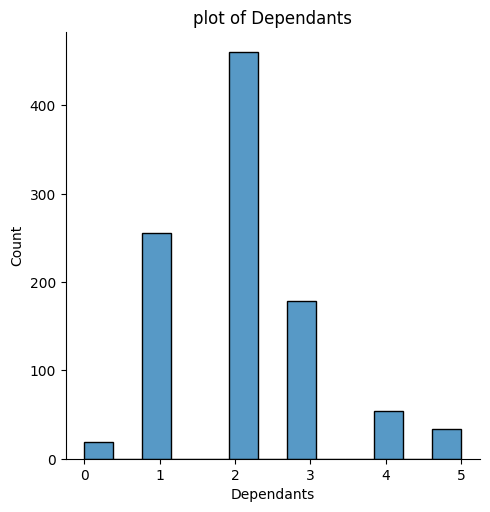

In [25]:
df['Dependants'].fillna(value = 0, inplace = True) 
dependant_plot = sns.displot(df, x = 'Dependants')
dependant_plot.set(title = 'plot of Dependants')
plt.show()

#### (c)

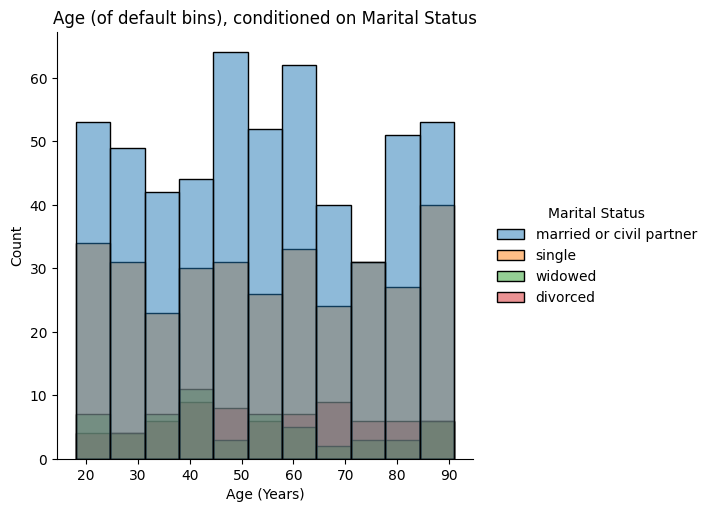

In [26]:
age_marriage = sns.displot(df, x = 'Age (Years)', hue = 'Marital Status')
age_marriage.set(title='Age (of default bins), conditioned on Marital Status') 
plt.show()

#### Question 3

####  Perform multivariate plots with the following data attributes:
#### (a) Commuted distance against salary.
#### (b) Age against Salary
#### (c)  Age against Salary conditioned by Depe

#### (a)

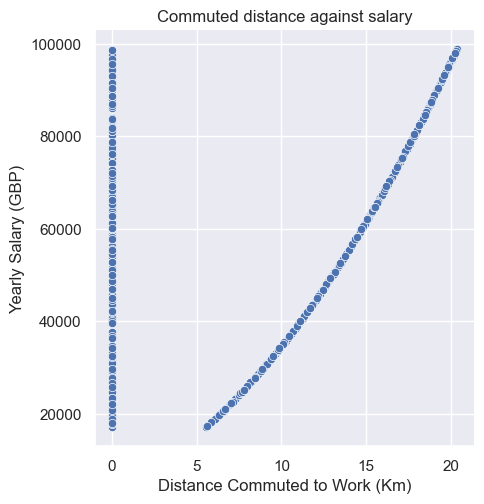

In [27]:
sns.set(rc={"figure.figsize":(5, 3)}) #width=4, height=3
distance_salary =sns.relplot(df, x = 'Distance Commuted to Work (Km)', y = 'Yearly Salary (GBP)')
distance_salary.set(title='Commuted distance against salary') 
plt.show()

#### (b)

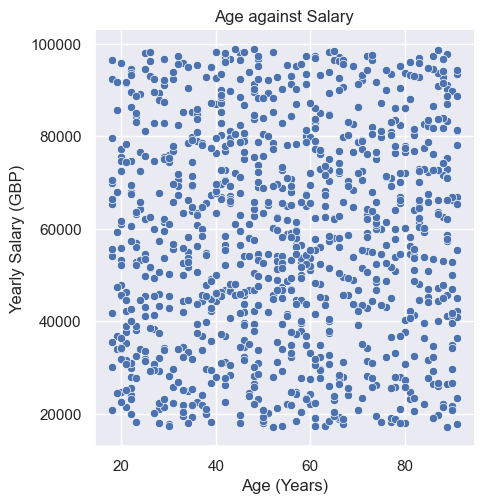

In [28]:
age_salary = sns.relplot(df, x = 'Age (Years)', y = 'Yearly Salary (GBP)')
age_salary.set(title='Age against Salary') 
plt.show()

#### (c)

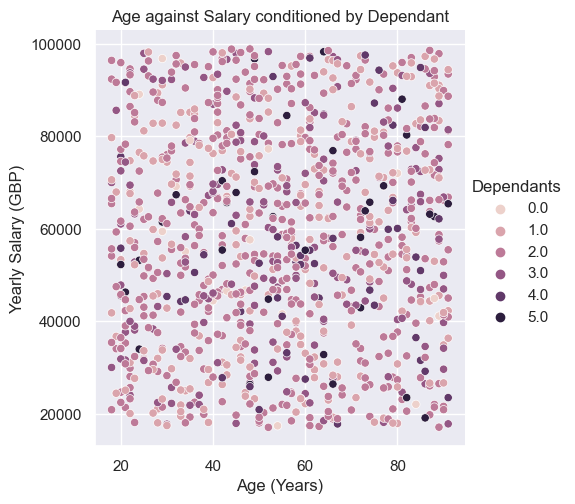

In [29]:
age_sal_dep = sns.relplot(df, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue = 'Dependants')
age_sal_dep.set(title='Age against Salary conditioned by Dependant') 
plt.show()

#### Question four
#### Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this

In [30]:
# create a file directory for each file
age_plot.savefig('./age_plot.png') 
dependant_plot.savefig('./dependant_plot.png')
age_marriage.savefig('./age_marriage.png')
distance_salary.savefig('./distance_salary.png')
age_salary.savefig('./age_salary.png') 
age_sal_dep.savefig('./age_sal_dep.png')